# **International Football Results From 1872 - 2023**

# <span style="font-size: 14.6667px;">Project 2 CAP 2761: Azure Vizualisations Project</span>

Source: [KAGGLE | DATASET](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017)<span style="font-size: 14.6667px;"><br></span>

## **Content:**

1\. Cleaning

2\. EDA

3\. Results

### **Cleaning:**

\- Import three tables through wizard

\- Table dbo.goalscorers had an error: some values had "NA" in coloumns with bunary or int datatypes, fixed in excel

\- Table dbo.goalscorers converted the dates incorrectly, fixed in excel

\- Dropped the Neutral coloumn from dbo.results

In [24]:
ALTER TABLE dbo.results
DROP COLUMN neutral

Commands completed successfully.

Total execution time: 00:00:00.118

### **EDA:**

\- Added winner column to dbo.results

In [ ]:
UPDATE dbo.results
SET winner = CASE
    WHEN away_score > home_score THEN away_team
    WHEN home_score > away_score THEN home_team
    ELSE 'Draw'
END;

\- Added matchID as PK in dbo.results and FK in dbo.goalscorers

In [ ]:
ALTER TABLE dbo.goalscorers
ADD matchID INT;

UPDATE g
SET g.matchID = r.matchID
FROM dbo.goalscorers g
JOIN dbo.results r ON g.date = r.date AND g.home_team = r.home_team AND g.away_team = r.away_team;

ALTER TABLE dbo.goalscorers
ADD CONSTRAINT fk_results
FOREIGN KEY (matchID)
REFERENCES dbo.results(matchID);

### **Results:**

In [ ]:
SELECT TOP 10 tournament, COUNT(tournament) as 'Games', SUM(home_score + away_score) as 'Total Goals'
FROM dbo.results
WHERE (NOT tournament = 'Friendly') AND (NOT tournament LIKE '%qualification%')
GROUP BY tournament
ORDER BY 'Total Goals' DESC

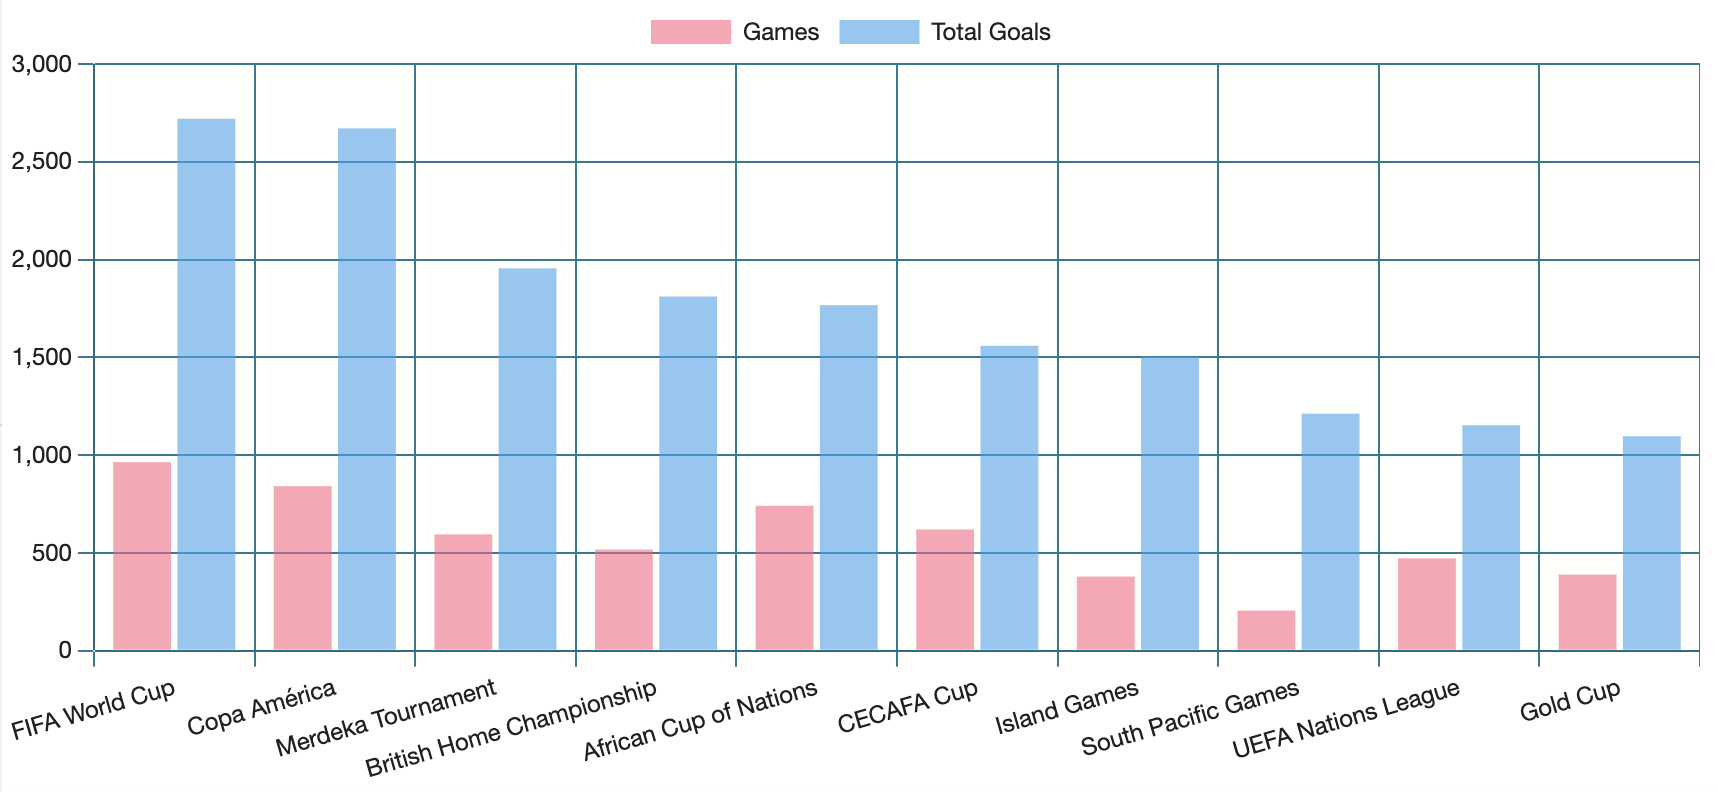

In [ ]:
SELECT TOP 10 winner as 'Country', COUNT(winner) as 'Wins at the World Cup'
FROM dbo.results
WHERE tournament = 'FIFA World Cup' AND NOT winner = 'DRAW'
GROUP BY winner
ORDER BY 'Wins at the World Cup' DESC

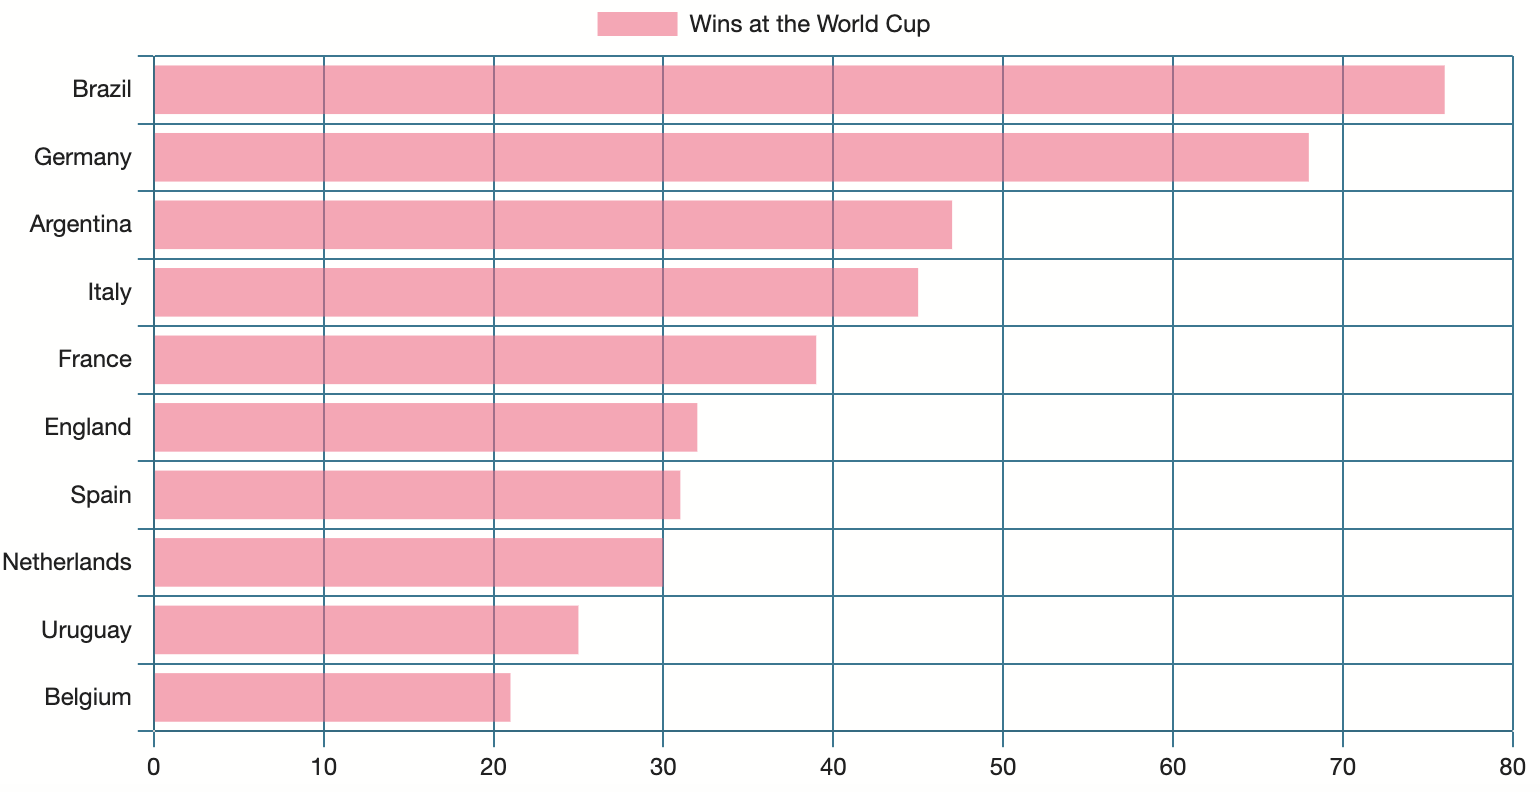

In [ ]:
SELECT TOP 10 winner as 'Country', COUNT(winner) as 'Friendly Wins'
FROM dbo.results
WHERE tournament = 'Friendly' AND NOT winner = 'DRAW'
GROUP BY winner
ORDER BY 'Friendly Wins' DESC

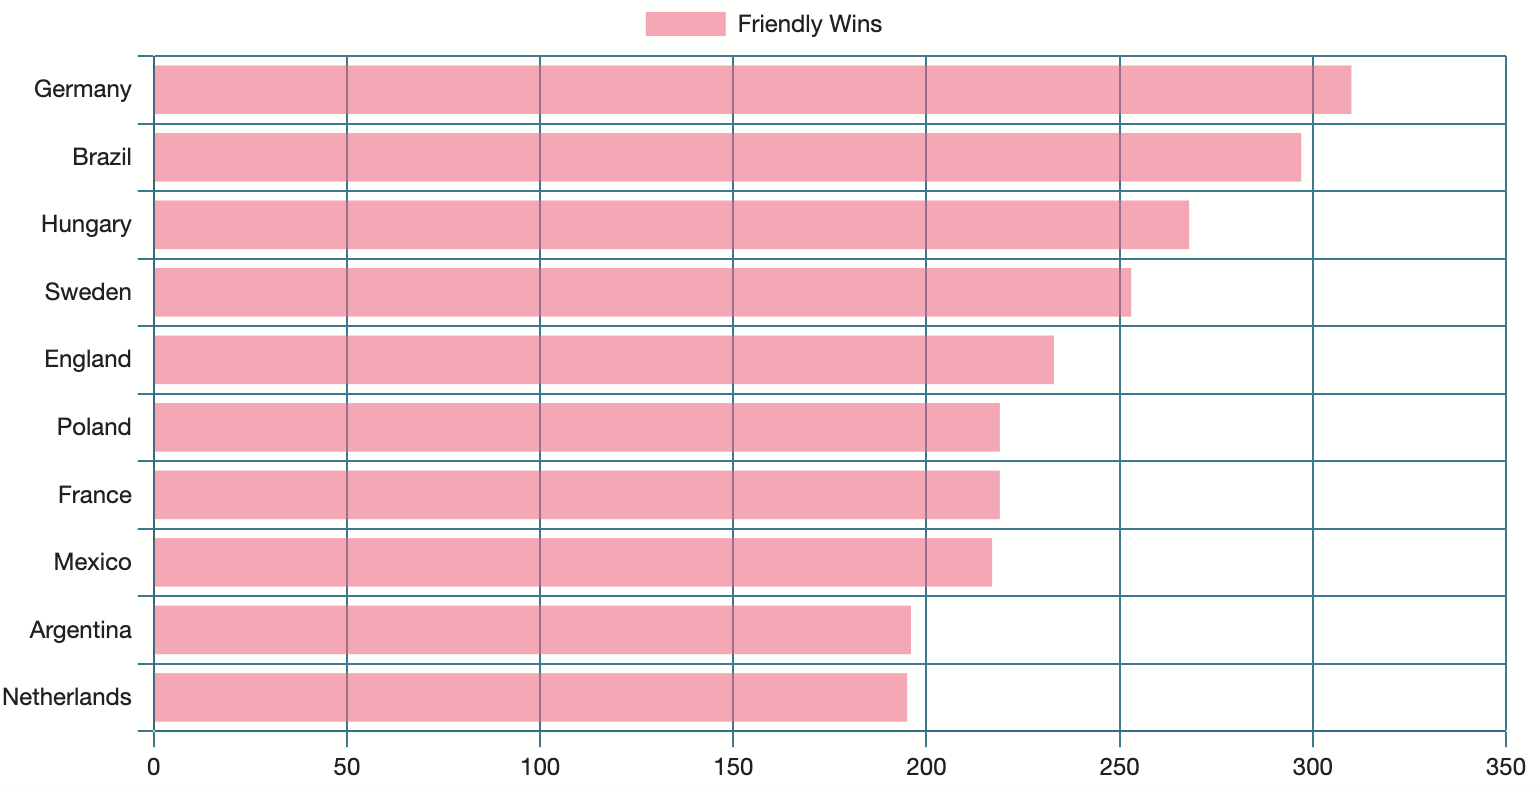

In [ ]:
SELECT DISTINCT TOP 5 scorer as 'Player', team as 'Country', count(scorer) as 'Total World Cup Goals'
FROM dbo.goalscorers g
INNER JOIN dbo.results r
ON g.matchID = r.matchID
WHERE tournament = 'FIFA World Cup'
GROUP BY scorer, team
ORDER BY 'Total World Cup Goals' DESC

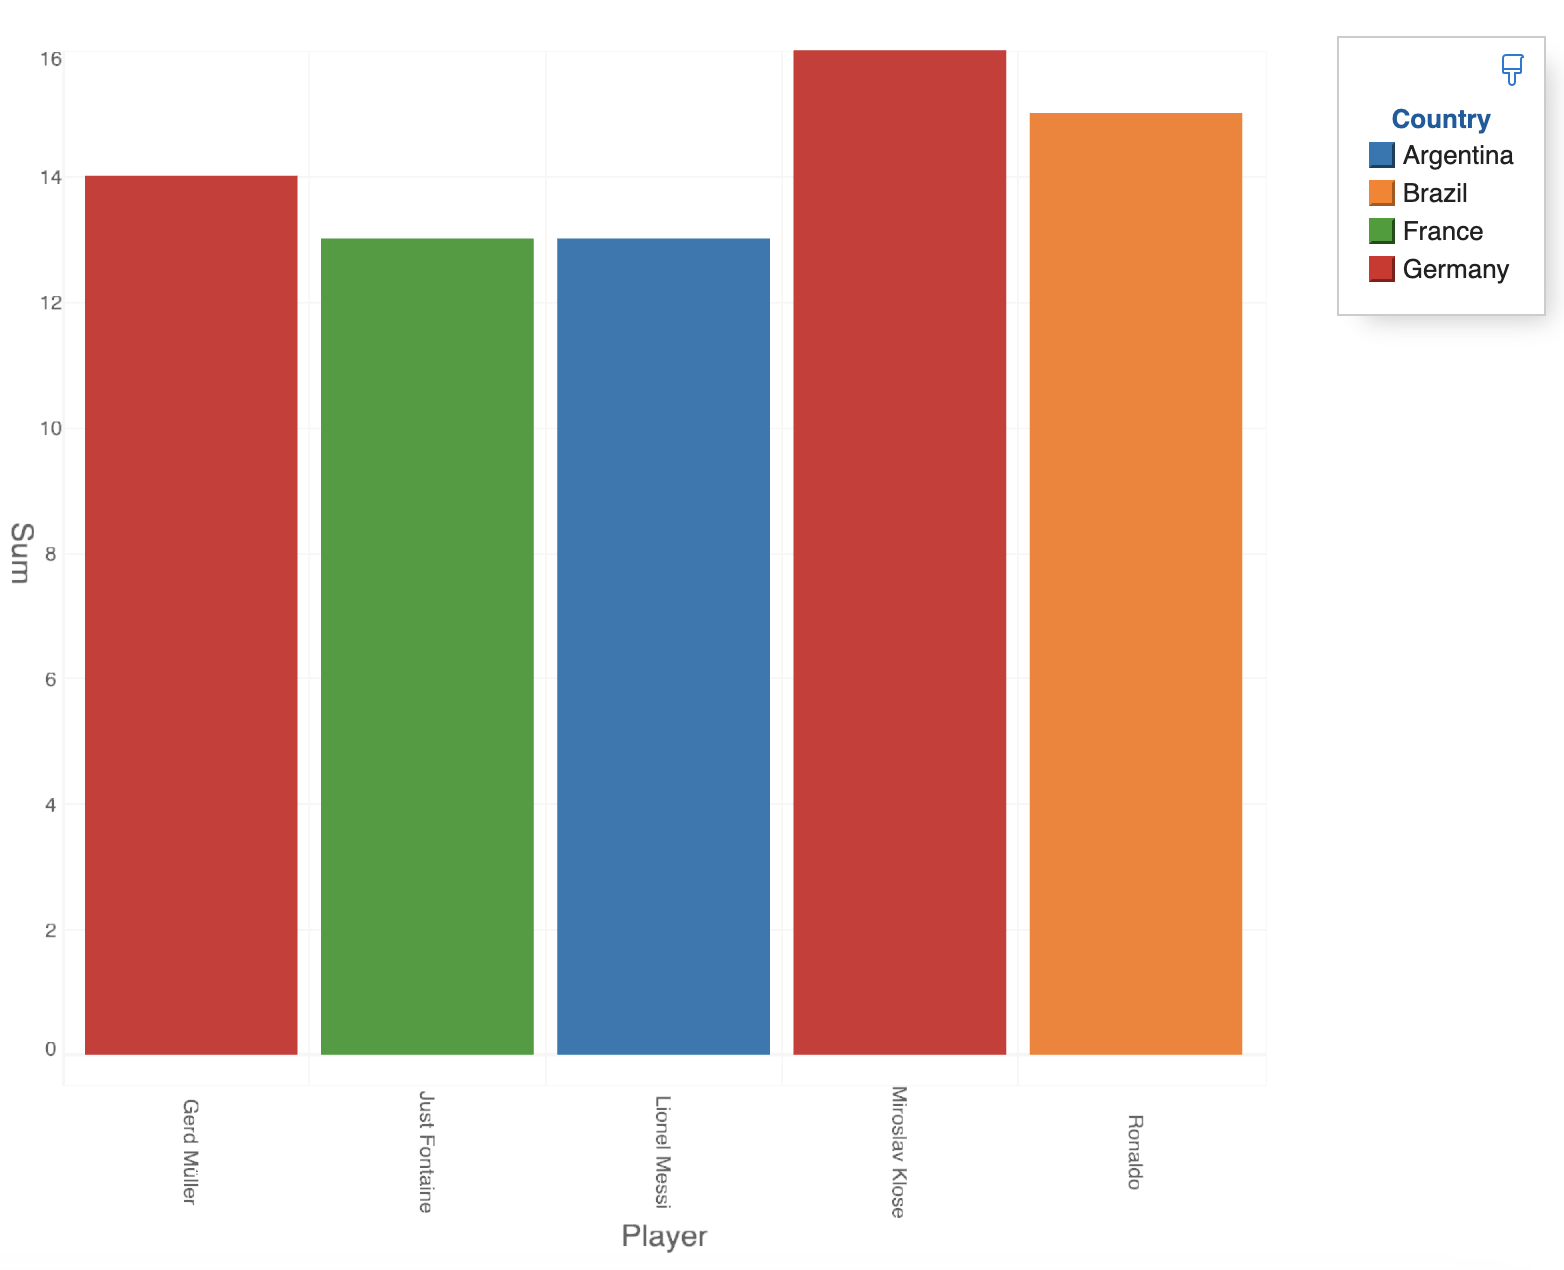

In [ ]:
SELECT DISTINCT TOP 5 scorer as 'Player', team as 'Country', count(scorer) as 'Total Goals'
FROM dbo.goalscorers g
INNER JOIN dbo.results r
ON g.matchID = r.matchID
--WHERE tournament = 'FIFA World Cup'
GROUP BY scorer, team
ORDER BY 'Total Goals' DESC

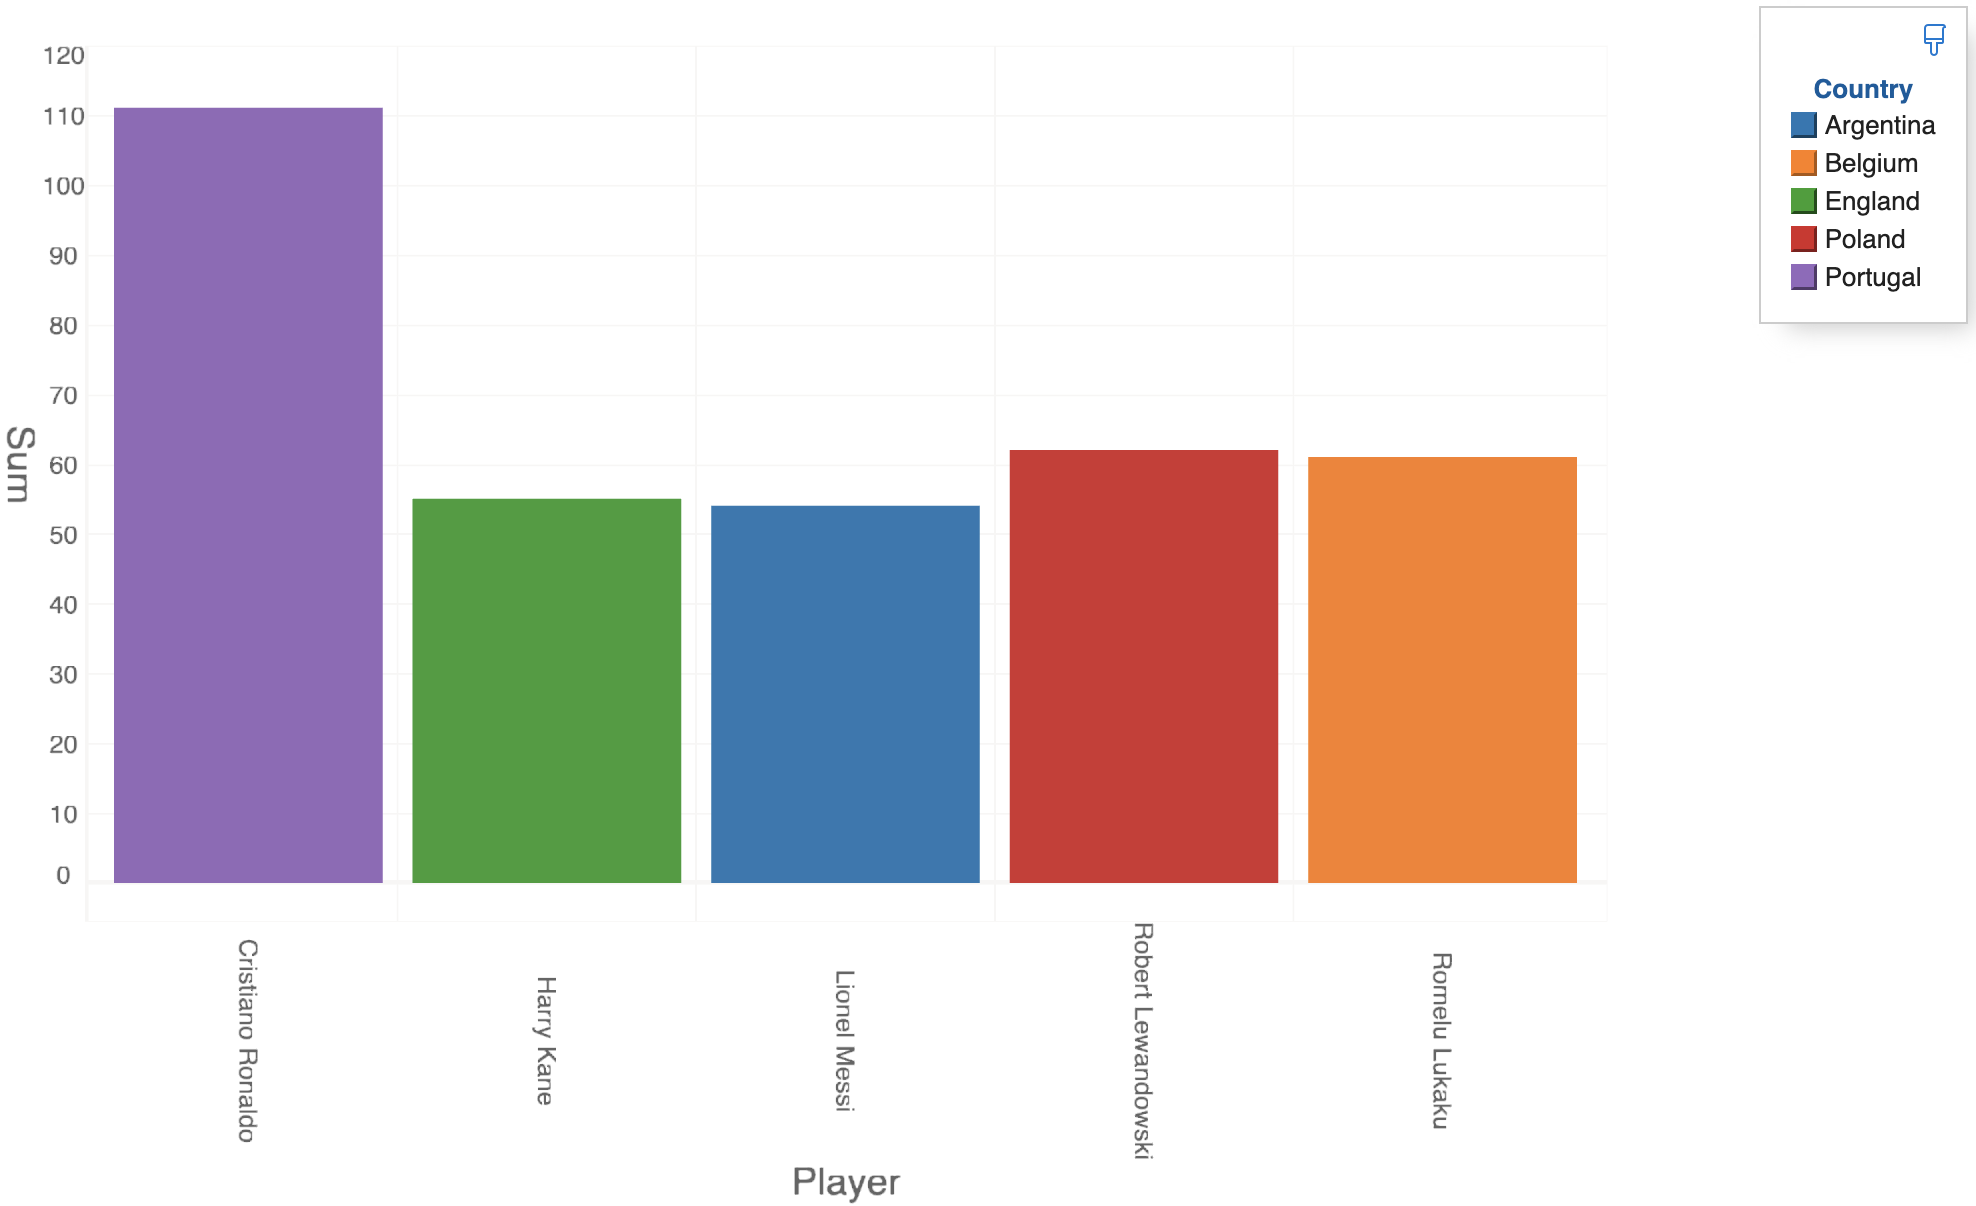